Name : Chinmayee Taralkar
Rollno. : BECOB262

DA Lab Assignment 2 - Use Naive Bayes‟ Algorithm for classification on Pima Indians Diabetes dataset

#Importing required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support


#Reading Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/rrichajalota/Pima-Indians-Diabetes-kaggle/master/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


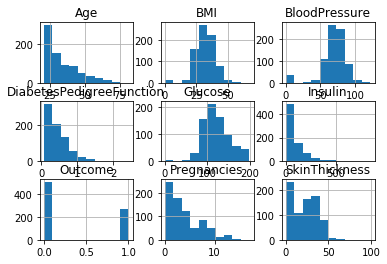

In [ ]:
df.hist()
plt.show()

#Separating independent variable X

In [ ]:
x = df.iloc[:,:-1]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


#separating dependent variable y

In [ ]:
y = df[['Outcome']]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


#Checking for null values in independent variables

In [ ]:
x.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
dtype: bool

#Checking for null values in dependent variable

In [ ]:
y.isnull().any()

Outcome    False
dtype: bool

In [ ]:
x_scaler = StandardScaler()
x = x_scaler.fit_transform(x)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size= 0.20,random_state=0)

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train,Y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[93, 14],
       [18, 29]], dtype=int64)

In [ ]:
accuracy = ((cm[0,0] + cm[1,1])/(cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]))*100
accuracy

79.22077922077922

In [ ]:
#inbuilt function
accuracy_score(Y_test,Y_pred)*100

79.22077922077922

In [ ]:
prf = precision_recall_fscore_support(Y_test,Y_pred)
print(prf)
print('Precision = ',prf[0]*100)
print('Recall = ',prf[1]*100)
print('F1 Score = ',prf[2]*100)

(array([0.83783784, 0.6744186 ]), array([0.86915888, 0.61702128]), array([0.85321101, 0.64444444]), array([107,  47], dtype=int64))
Precision =  [83.78378378 67.44186047]
Recall =  [86.91588785 61.70212766]
F1 Score =  [85.32110092 64.44444444]


In [ ]:
import sklearn.metrics as sm
print(sm.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

